<a href="https://colab.research.google.com/github/markussitumorang/randomforestwine/blob/main/Tubes_ML_random_forest_wine_qualitu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

EDA


Metadata Dataset:
 {'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Model

<ipython-input-3-8e3ea7ecea2c>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['quality'], palette="viridis")


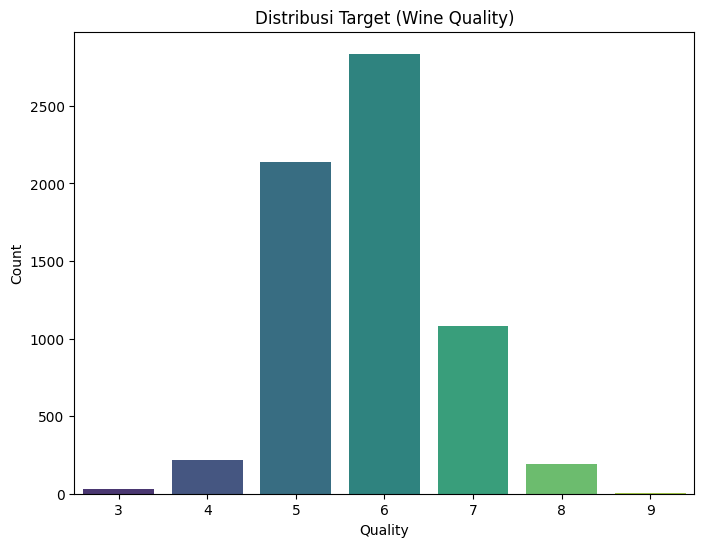

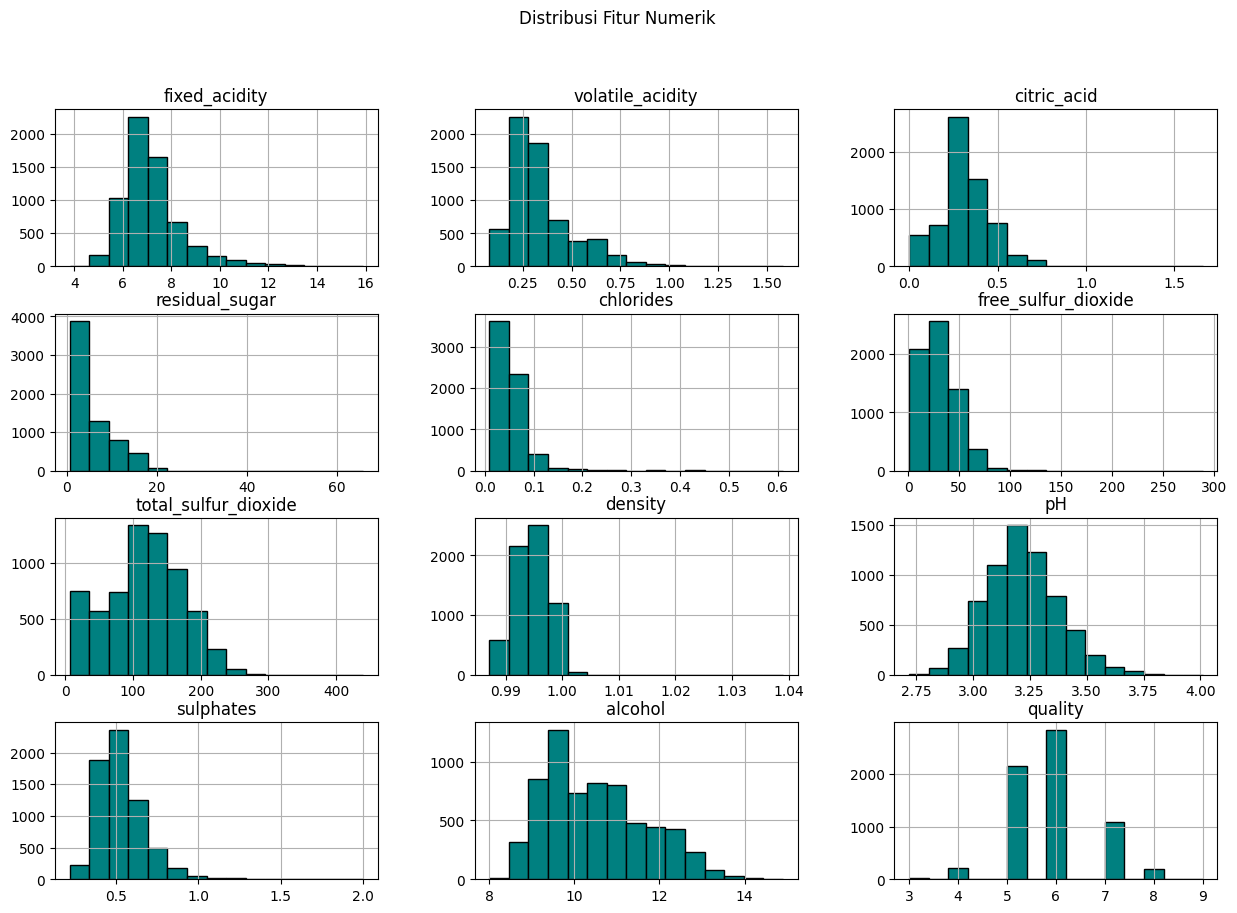

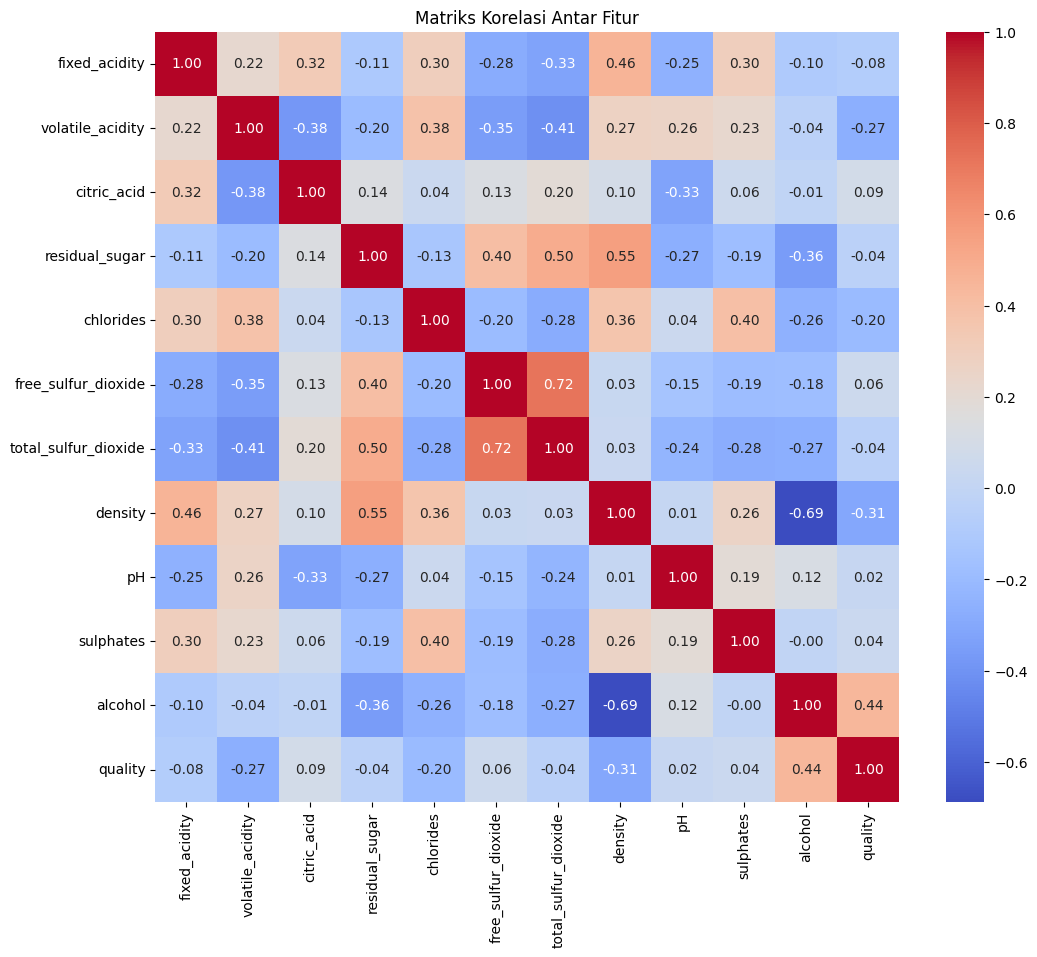


Korelasi Fitur dengan Target (Quality):
 quality                 1.000000
alcohol                 0.444319
citric_acid             0.085532
free_sulfur_dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual_sugar         -0.036980
total_sulfur_dioxide   -0.041385
fixed_acidity          -0.076743
chlorides              -0.200666
volatile_acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


In [ ]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
from ucimlrepo import fetch_ucirepo
wine_quality = fetch_ucirepo(id=186)

# Data features (X) dan target (y)
X = wine_quality.data.features
y = wine_quality.data.targets

# Metadata
print("\nMetadata Dataset:\n", wine_quality.metadata)

# Variabel dalam dataset
print("\nInformasi Variabel Dataset:\n", wine_quality.variables)

# Menggabungkan fitur dan target untuk inspeksi awal
data = pd.concat([X, y], axis=1)
data.columns = list(X.columns) + ["quality"]

# Menampilkan 5 baris pertama data
print("\nLima Baris Pertama Data:\n", data.head())

# Informasi tipe data
print("\nInformasi Data:\n")
print(data.info())

# Statistik deskriptif untuk data numerik
print("\nStatistik Deskriptif Data Numerik:\n", data.describe())

# Cek nilai yang hilang
missing_values = data.isnull().sum()
print("\nCek Missing Values:\n", missing_values)

# Distribusi target (quality)
print("\nDistribusi Target (Quality):\n", data['quality'].value_counts())

# Visualisasi distribusi target
plt.figure(figsize=(8, 6))
sns.countplot(x=data['quality'], palette="viridis")
plt.title("Distribusi Target (Wine Quality)")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

# Visualisasi distribusi numerik
data.hist(bins=15, figsize=(15, 10), layout=(4, 3), color='teal', edgecolor='black')
plt.suptitle("Distribusi Fitur Numerik")
plt.show()

# Korelasi antar fitur
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriks Korelasi Antar Fitur")
plt.show()

# Analisis korelasi target dengan fitur
correlation_with_target = data.corr()['quality'].sort_values(ascending=False)
print("\nKorelasi Fitur dengan Target (Quality):\n", correlation_with_target)


PREPROCESSING

Cek Missing Values:
 fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Distribusi Target Setelah Encoding:
 quality_category
Medium    3915
Low       2384
High       198
Name: count, dtype: int64


<ipython-input-4-63164d5c5004>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['quality_category'], palette="viridis")


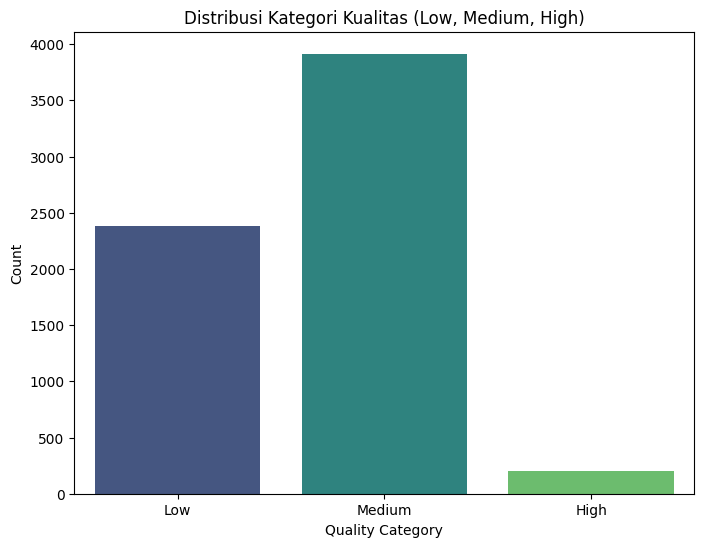


Contoh Data Setelah Scaling:
    fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol  
0  0.202899

In [ ]:
# Import library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Cek nilai hilang
missing_values = data.isnull().sum()
print("Cek Missing Values:\n", missing_values)

# Encoding target (Quality menjadi kategori: Low, Medium, High)
bins = [0, 5, 7, 10]  # Interval kualitas
labels = ['Low', 'Medium', 'High']
data['quality_category'] = pd.cut(data['quality'], bins=bins, labels=labels, include_lowest=True)

# Periksa distribusi target setelah encoding
print("\nDistribusi Target Setelah Encoding:\n", data['quality_category'].value_counts())

# Visualisasi distribusi target setelah encoding
plt.figure(figsize=(8, 6))
sns.countplot(x=data['quality_category'], palette="viridis")
plt.title("Distribusi Kategori Kualitas (Low, Medium, High)")
plt.xlabel("Quality Category")
plt.ylabel("Count")
plt.show()

# Pisahkan fitur dan target
X = data.drop(columns=['quality', 'quality_category'])
y = data['quality_category']

# Skala fitur numerik menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Periksa hasil scaling
print("\nContoh Data Setelah Scaling:\n", X_scaled.head())

# Pisahkan dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Periksa distribusi target pada data latih dan uji
print("\nDistribusi Target pada Data Latih:\n", y_train.value_counts(normalize=True))
print("\nDistribusi Target pada Data Uji:\n", y_test.value_counts(normalize=True))


Ukuran Data Latih: 5197 sampel
Ukuran Data Uji: 1300 sampel

Distribusi Target pada Data Latih:
quality_category
Medium    0.602655
Low       0.366942
High      0.030402
Name: proportion, dtype: float64

Distribusi Target pada Data Uji:
quality_category
Medium    0.602308
Low       0.366923
High      0.030769
Name: proportion, dtype: float64


<ipython-input-5-5020e89a4a65>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="viridis")


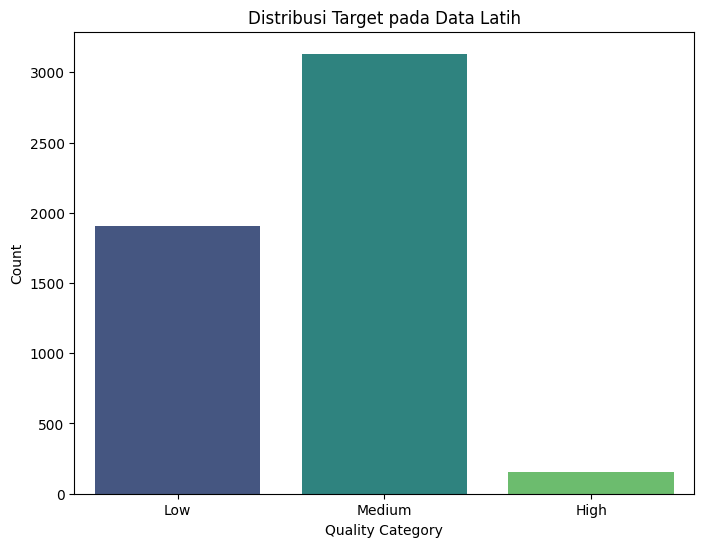

<ipython-input-5-5020e89a4a65>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette="viridis")


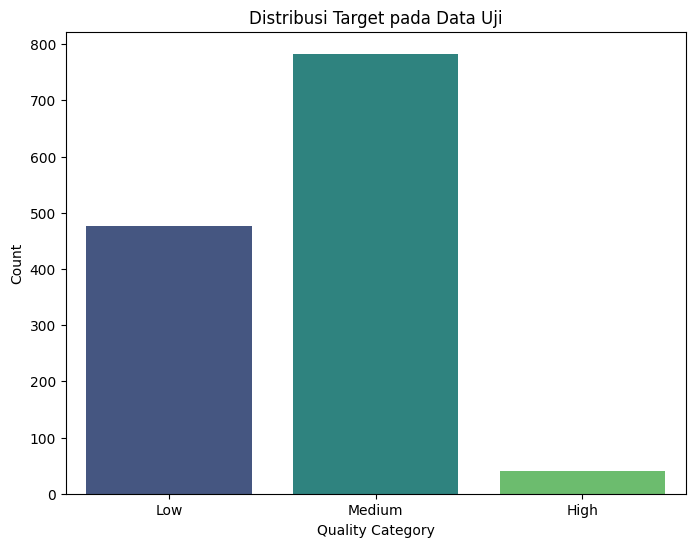

In [ ]:
# Import library
from sklearn.model_selection import train_test_split

# Pembagian dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Tampilkan ukuran dataset setelah pembagian
print(f"Ukuran Data Latih: {X_train.shape[0]} sampel")
print(f"Ukuran Data Uji: {X_test.shape[0]} sampel")

# Periksa distribusi target pada data latih
print("\nDistribusi Target pada Data Latih:")
print(y_train.value_counts(normalize=True))

# Periksa distribusi target pada data uji
print("\nDistribusi Target pada Data Uji:")
print(y_test.value_counts(normalize=True))

# Visualisasi distribusi target pada data latih
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, palette="viridis")
plt.title("Distribusi Target pada Data Latih")
plt.xlabel("Quality Category")
plt.ylabel("Count")
plt.show()

# Visualisasi distribusi target pada data uji
plt.figure(figsize=(8, 6))
sns.countplot(x=y_test, palette="viridis")
plt.title("Distribusi Target pada Data Uji")
plt.xlabel("Quality Category")
plt.ylabel("Count")
plt.show()


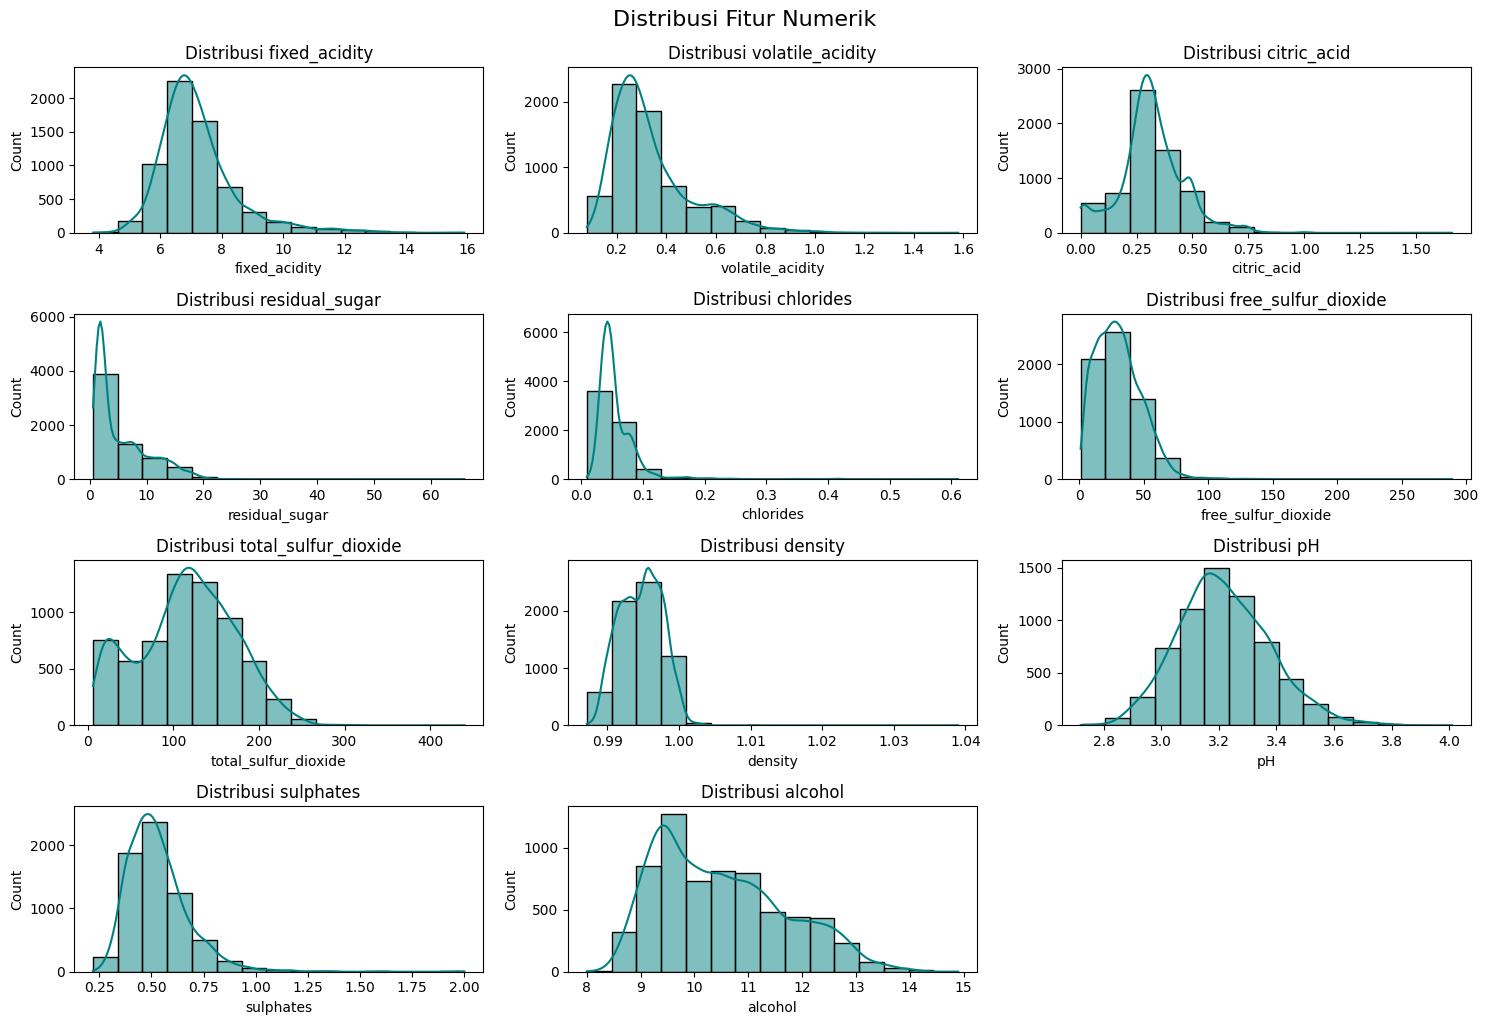

<ipython-input-6-9721ea04870a>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=data, palette="viridis")
<ipython-input-6-9721ea04870a>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=data, palette="viridis")
<ipython-input-6-9721ea04870a>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=data, palette="viridis")
<ipython-input-6-9721ea04870a>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

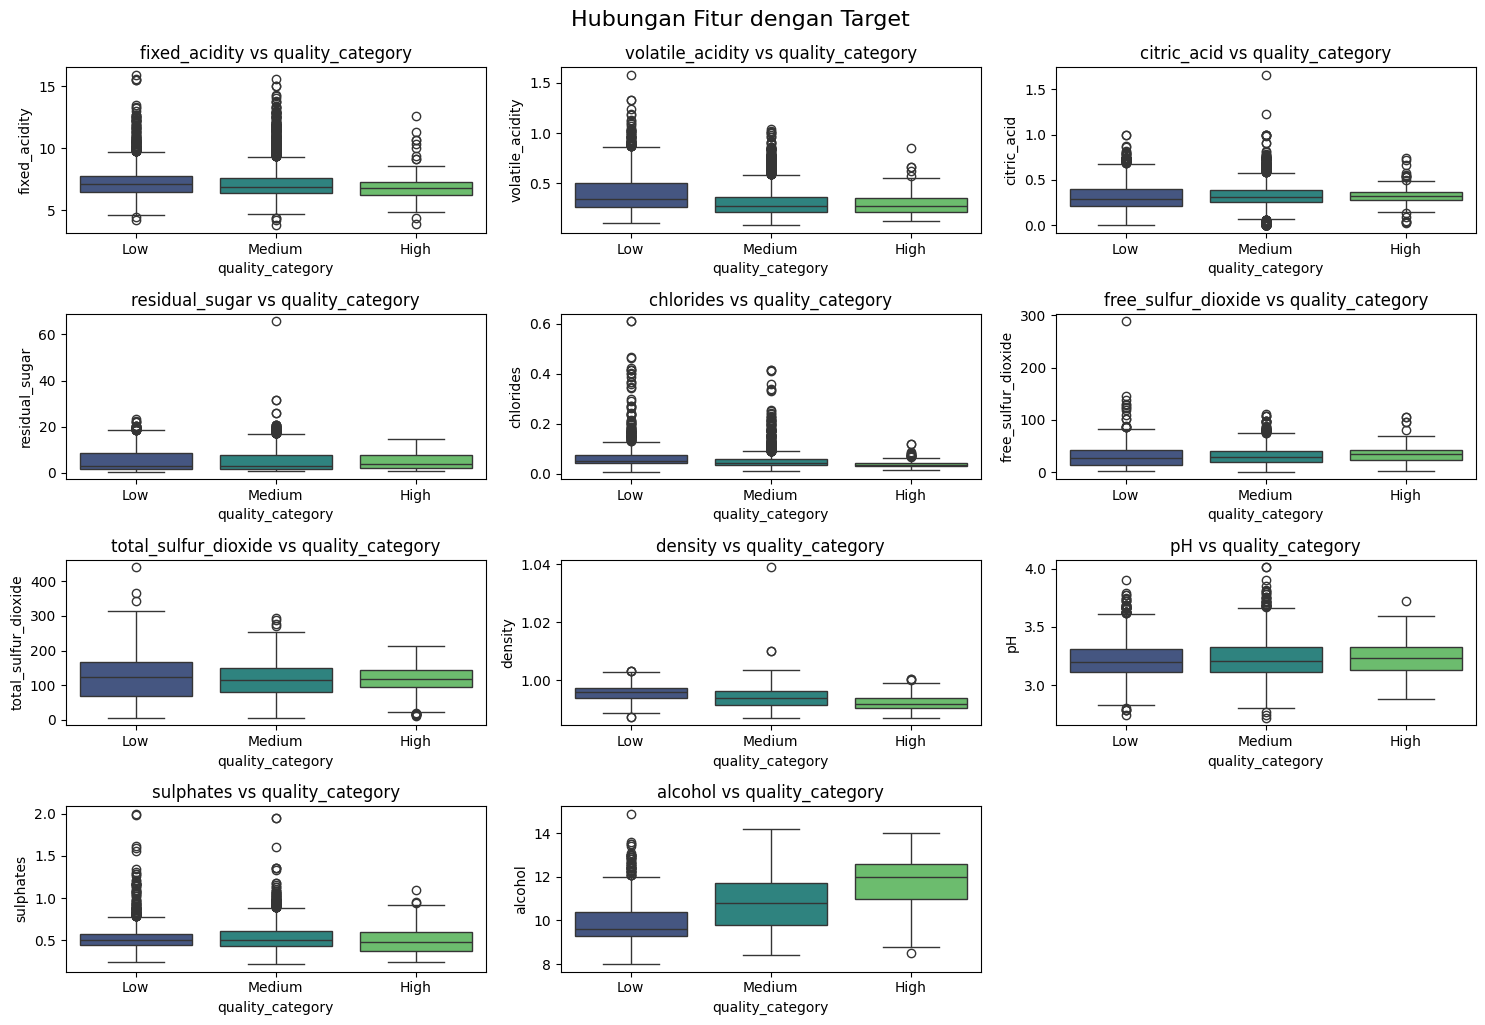

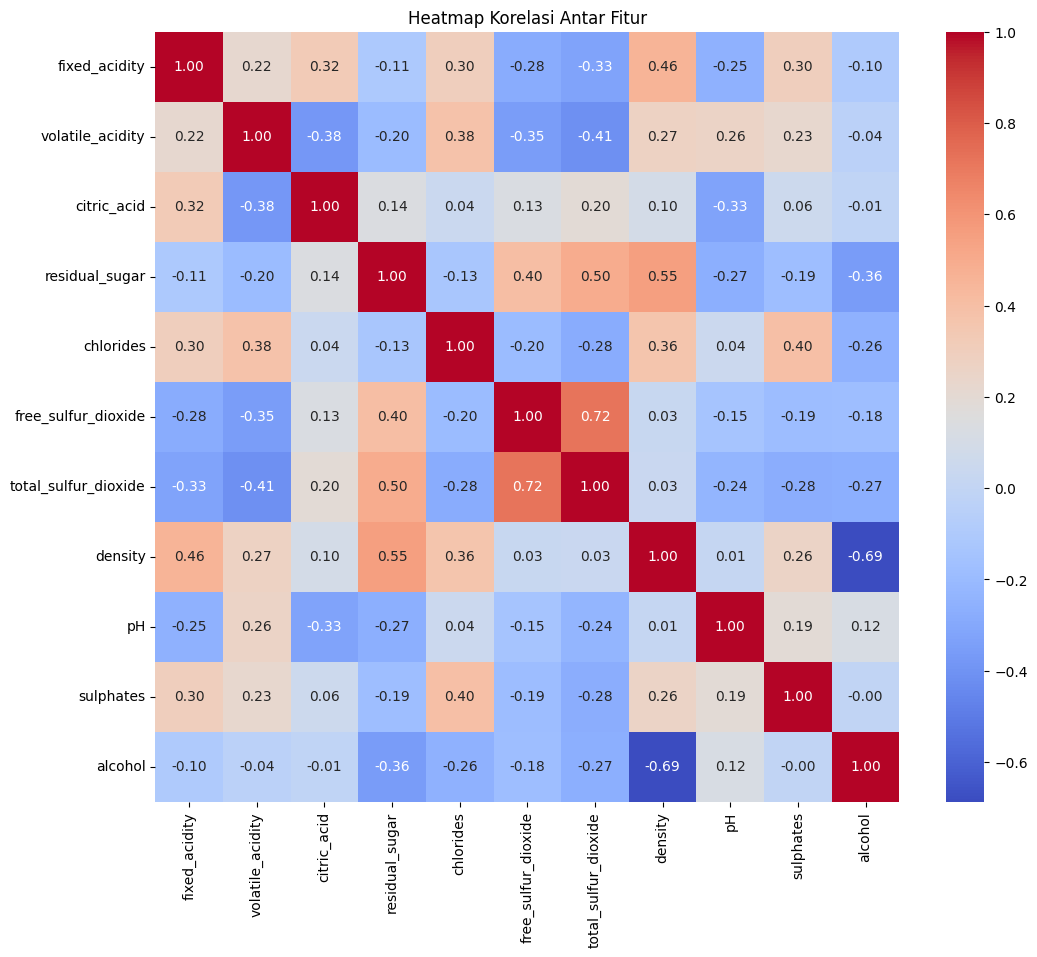

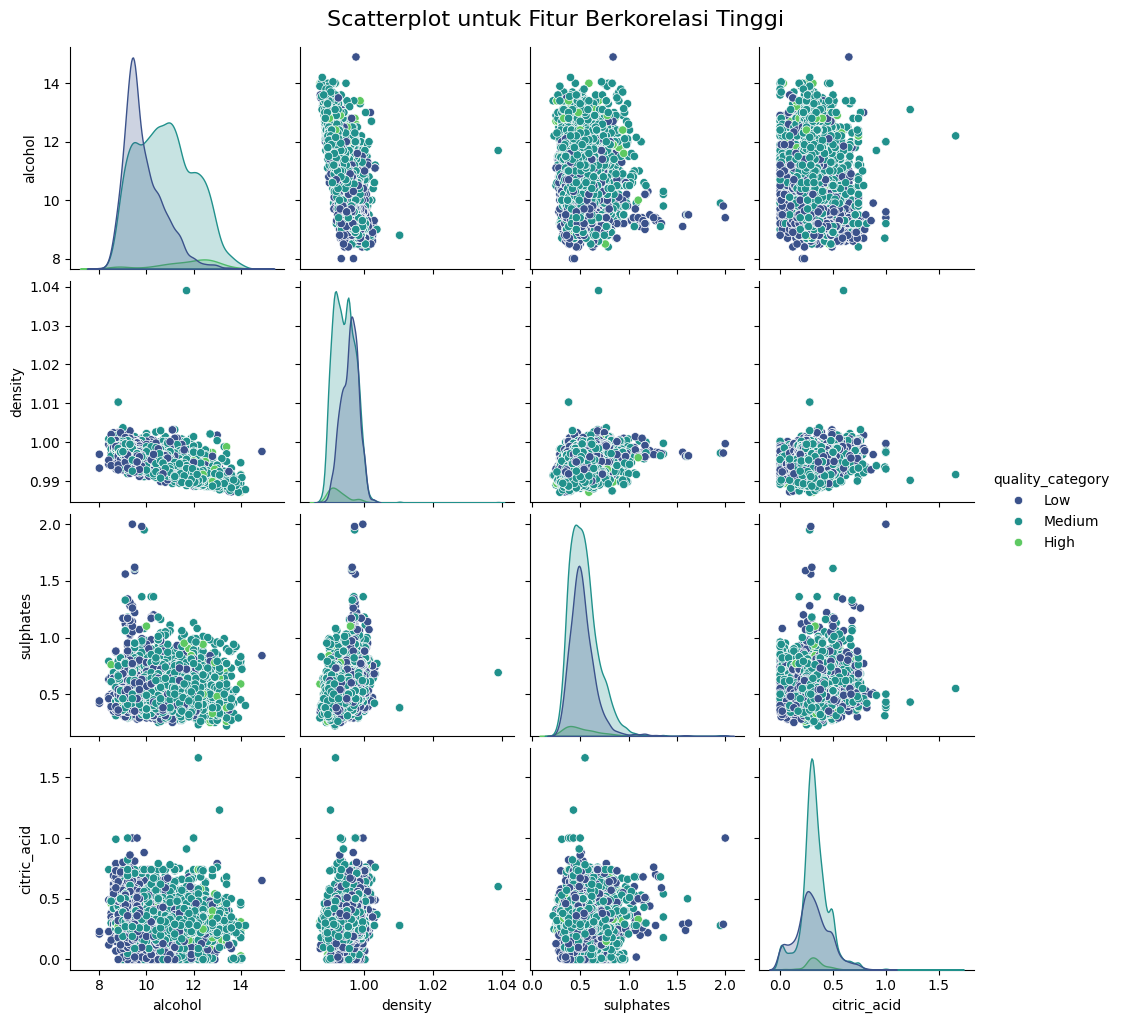

<ipython-input-6-9721ea04870a>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality_category', data=data, palette="viridis")


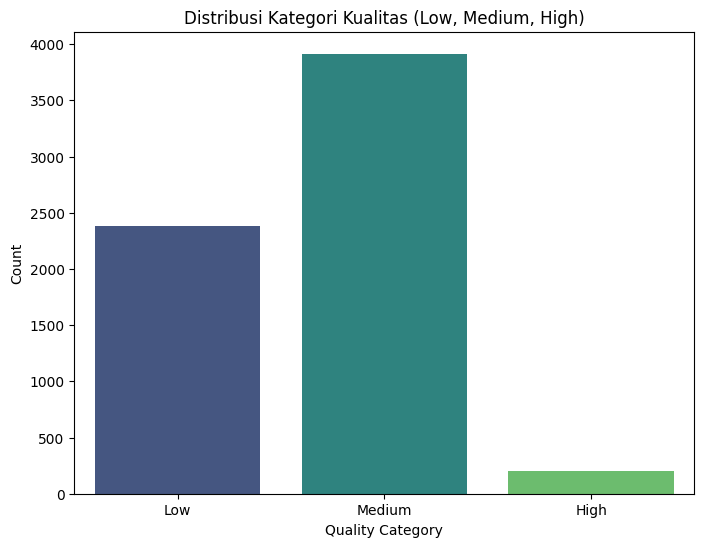

In [ ]:
# Import library visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Visualisasi distribusi fitur numerik
def plot_feature_distribution(data, features, title):
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features, 1):
        plt.subplot(4, 3, i)
        sns.histplot(data[feature], kde=True, color='teal', bins=15)
        plt.title(f"Distribusi {feature}")
    plt.tight_layout()
    plt.suptitle(title, y=1.02, fontsize=16)
    plt.show()

plot_feature_distribution(data, X.columns, "Distribusi Fitur Numerik")

# 2. Visualisasi hubungan fitur dengan target
def plot_feature_vs_target(data, features, target, title):
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features, 1):
        plt.subplot(4, 3, i)
        sns.boxplot(x=target, y=feature, data=data, palette="viridis")
        plt.title(f"{feature} vs {target}")
    plt.tight_layout()
    plt.suptitle(title, y=1.02, fontsize=16)
    plt.show()

plot_feature_vs_target(data, X.columns, 'quality_category', "Hubungan Fitur dengan Target")

# 3. Visualisasi heatmap korelasi antar fitur
plt.figure(figsize=(12, 10))
sns.heatmap(data[X.columns].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

# 4. Scatterplot untuk fitur yang berkorelasi tinggi
correlated_features = ['alcohol', 'density', 'sulphates', 'citric_acid']
sns.pairplot(data=data, vars=correlated_features, hue="quality_category", palette="viridis", diag_kind='kde')
plt.suptitle("Scatterplot untuk Fitur Berkorelasi Tinggi", y=1.02, fontsize=16)
plt.show()

# 5. Visualisasi distribusi target
plt.figure(figsize=(8, 6))
sns.countplot(x='quality_category', data=data, palette="viridis")
plt.title("Distribusi Kategori Kualitas (Low, Medium, High)")
plt.xlabel("Quality Category")
plt.ylabel("Count")
plt.show()


Baseline Accuracy: 82.46%

Classification Report (Baseline Model):

              precision    recall  f1-score   support

        High       1.00      0.47      0.64        40
         Low       0.79      0.76      0.78       477
      Medium       0.84      0.88      0.86       783

    accuracy                           0.82      1300
   macro avg       0.88      0.71      0.76      1300
weighted avg       0.83      0.82      0.82      1300



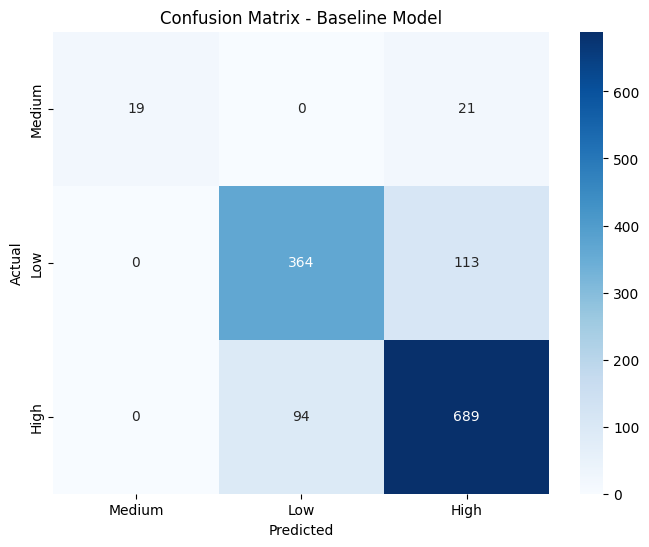

In [ ]:
# Import library untuk modeling dan evaluasi
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Inisialisasi model Random Forest
rf_baseline = RandomForestClassifier(random_state=42)

# Latih model pada data latih
rf_baseline.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_baseline = rf_baseline.predict(X_test)

# Evaluasi model
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Accuracy: {baseline_accuracy * 100:.2f}%")

# Laporan klasifikasi
print("\nClassification Report (Baseline Model):\n")
print(classification_report(y_test, y_pred_baseline))

# Confusion Matrix
cm_baseline = confusion_matrix(y_test, y_pred_baseline)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues',
            xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.title("Confusion Matrix - Baseline Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
<ipython-input-8-ef600d318b0d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `le

Distribusi Target Sebelum Oversampling:
 Counter({'Medium': 3132, 'Low': 1907, 'High': 158})
Distribusi Target Setelah Oversampling:
 Counter({'Medium': 3132, 'Low': 3132, 'High': 3132})


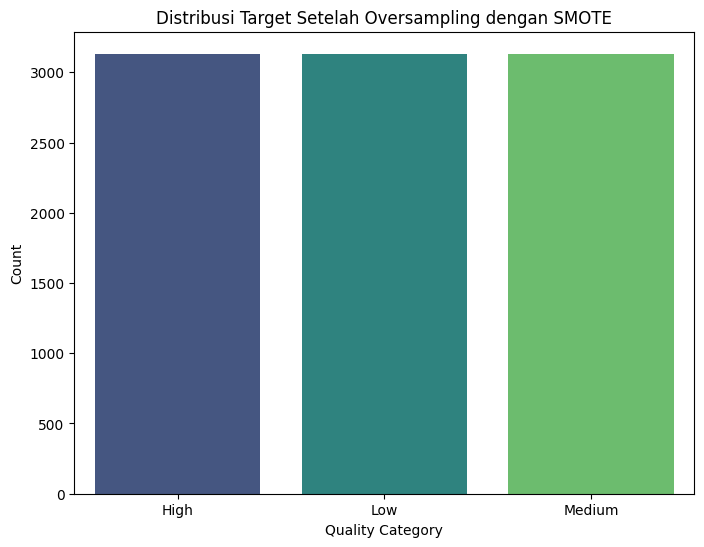

In [ ]:
# Import library SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Lakukan oversampling pada data latih
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Periksa distribusi target setelah oversampling
print("Distribusi Target Sebelum Oversampling:\n", Counter(y_train))
print("Distribusi Target Setelah Oversampling:\n", Counter(y_train_resampled))

# Visualisasi distribusi target setelah SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled, palette="viridis", order=np.sort(y_train_resampled.unique()))
plt.title("Distribusi Target Setelah Oversampling dengan SMOTE")
plt.xlabel("Quality Category")
plt.ylabel("Count")
plt.show()


Accuracy dengan SMOTE: 80.62%

Classification Report (Model dengan SMOTE):

              precision    recall  f1-score   support

        High       0.52      0.55      0.54        40
         Low       0.76      0.80      0.78       477
      Medium       0.85      0.82      0.84       783

    accuracy                           0.81      1300
   macro avg       0.71      0.72      0.72      1300
weighted avg       0.81      0.81      0.81      1300



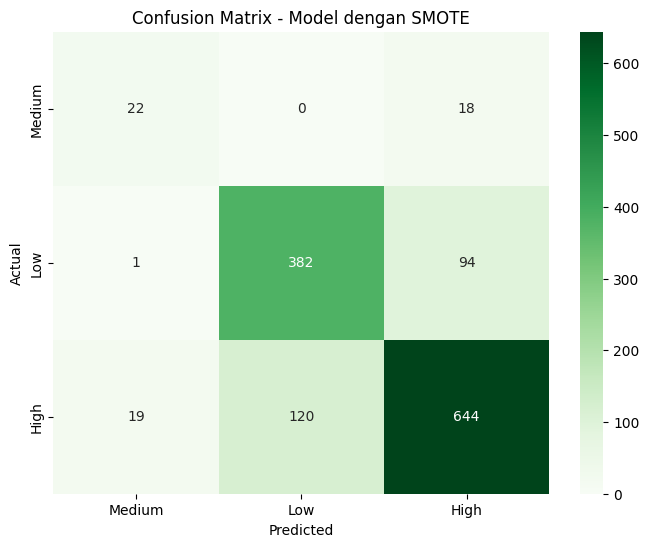

In [ ]:
# Import library untuk modeling dan evaluasi
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Inisialisasi model Random Forest
rf_smote = RandomForestClassifier(random_state=42)

# Latih model pada data latih yang telah diresampling
rf_smote.fit(X_train_resampled, y_train_resampled)

# Prediksi pada data uji
y_pred_smote = rf_smote.predict(X_test)

# Evaluasi model
smote_accuracy = accuracy_score(y_test, y_pred_smote)
print(f"Accuracy dengan SMOTE: {smote_accuracy * 100:.2f}%")

# Laporan klasifikasi
print("\nClassification Report (Model dengan SMOTE):\n")
print(classification_report(y_test, y_pred_smote))

# Confusion Matrix
cm_smote = confusion_matrix(y_test, y_pred_smote)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Greens',
            xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.title("Confusion Matrix - Model dengan SMOTE")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 5 folds for each of 162 candidates, totalling 810 fits

Best Parameters dari GridSearchCV:
 {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Best Model Accuracy: 80.92%

Classification Report (Best Model):

              precision    recall  f1-score   support

        High       0.52      0.55      0.54        40
         Low       0.76      0.81      0.78       477
      Medium       0.85      0.83      0.84       783

    accuracy                           0.81      1300
   macro avg       0.71      0.73      0.72      1300
weighted avg       0.81      0.81      0.81      1300



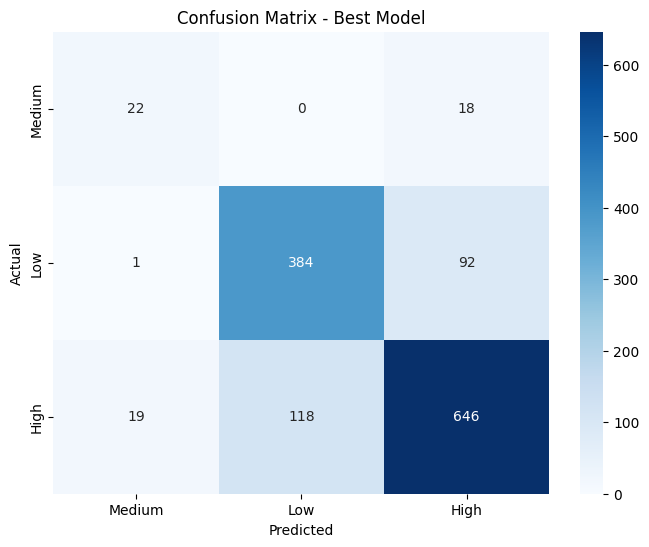

In [ ]:
# Import library untuk GridSearchCV
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid untuk tuning
param_grid = {
    'n_estimators': [100, 200, 300],       # Jumlah pohon
    'max_depth': [10, 20, None],          # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],      # Minimum sampel untuk split
    'min_samples_leaf': [1, 2, 4],        # Minimum sampel di daun
    'max_features': ['sqrt', 'log2'],     # Jumlah fitur yang dipertimbangkan untuk split
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',   # Evaluasi berdasarkan akurasi
    cv=5,                 # 5-fold cross-validation
    verbose=2,            # Menampilkan log proses tuning
    n_jobs=-1             # Menggunakan semua prosesor
)

# Latih GridSearchCV pada data latih yang telah diresampling
grid_search.fit(X_train_resampled, y_train_resampled)

# Tampilkan parameter terbaik
print("\nBest Parameters dari GridSearchCV:\n", grid_search.best_params_)

# Model terbaik dari GridSearchCV
best_rf_model = grid_search.best_estimator_

# Prediksi pada data uji menggunakan model terbaik
y_pred_best = best_rf_model.predict(X_test)

# Evaluasi model terbaik
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"\nBest Model Accuracy: {best_accuracy * 100:.2f}%")

# Laporan klasifikasi untuk model terbaik
print("\nClassification Report (Best Model):\n")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix untuk model terbaik
cm_best = confusion_matrix(y_test, y_pred_best)

# Visualisasi Confusion Matrix untuk model terbaik
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues',
            xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.title("Confusion Matrix - Best Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Accuracy of the Best Model: 80.92%

Classification Report for the Best Model:

              precision    recall  f1-score   support

        High       0.52      0.55      0.54        40
         Low       0.76      0.81      0.78       477
      Medium       0.85      0.83      0.84       783

    accuracy                           0.81      1300
   macro avg       0.71      0.73      0.72      1300
weighted avg       0.81      0.81      0.81      1300



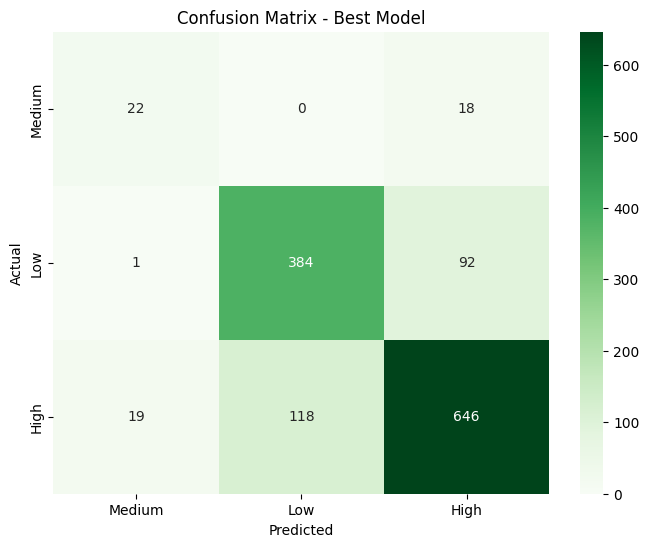

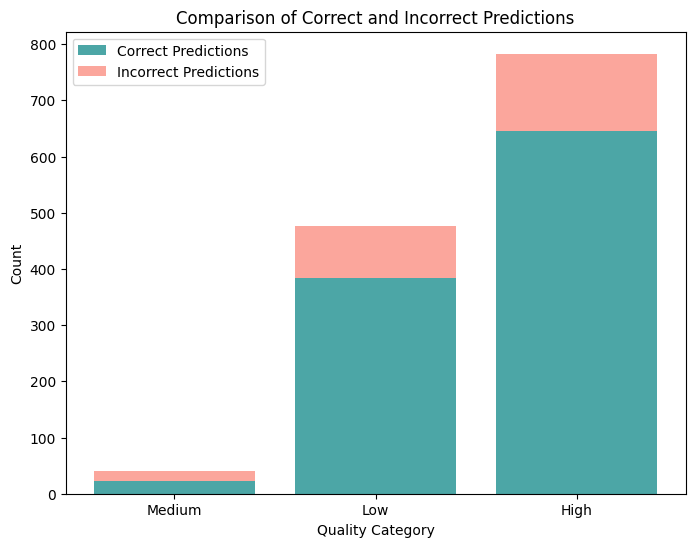

Precision (Weighted): 81.15%
Recall (Weighted): 80.92%
F1-Score (Weighted): 81.00%


In [ ]:
# Evaluasi akurasi model terbaik
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy of the Best Model: {best_accuracy * 100:.2f}%")

# Laporan klasifikasi untuk model terbaik
print("\nClassification Report for the Best Model:\n")
print(classification_report(y_test, y_pred_best))

# Matriks kebingungan untuk model terbaik
cm_best = confusion_matrix(y_test, y_pred_best)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens',
            xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.title("Confusion Matrix - Best Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualisasi perbandingan prediksi dan aktual
plt.figure(figsize=(8, 6))
plt.bar(y_test.unique(), np.diag(cm_best), color='teal', alpha=0.7, label='Correct Predictions')
plt.bar(y_test.unique(), np.sum(cm_best, axis=1) - np.diag(cm_best),
        color='salmon', alpha=0.7, label='Incorrect Predictions', bottom=np.diag(cm_best))
plt.xticks(ticks=range(len(y_test.unique())), labels=y_test.unique())
plt.xlabel("Quality Category")
plt.ylabel("Count")
plt.title("Comparison of Correct and Incorrect Predictions")
plt.legend()
plt.show()

# Menampilkan metrik tambahan untuk model terbaik
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')

print(f"Precision (Weighted): {precision * 100:.2f}%")
print(f"Recall (Weighted): {recall * 100:.2f}%")
print(f"F1-Score (Weighted): {f1 * 100:.2f}%")



Feature Importance dari Model Terbaik:

                 Feature  Importance
10               alcohol    0.192303
1       volatile_acidity    0.103895
7                density    0.100749
4              chlorides    0.085585
2            citric_acid    0.082069
3         residual_sugar    0.074955
5    free_sulfur_dioxide    0.074836
6   total_sulfur_dioxide    0.073553
9              sulphates    0.071072
8                     pH    0.071033
0          fixed_acidity    0.069951


<ipython-input-12-57859453e10d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")


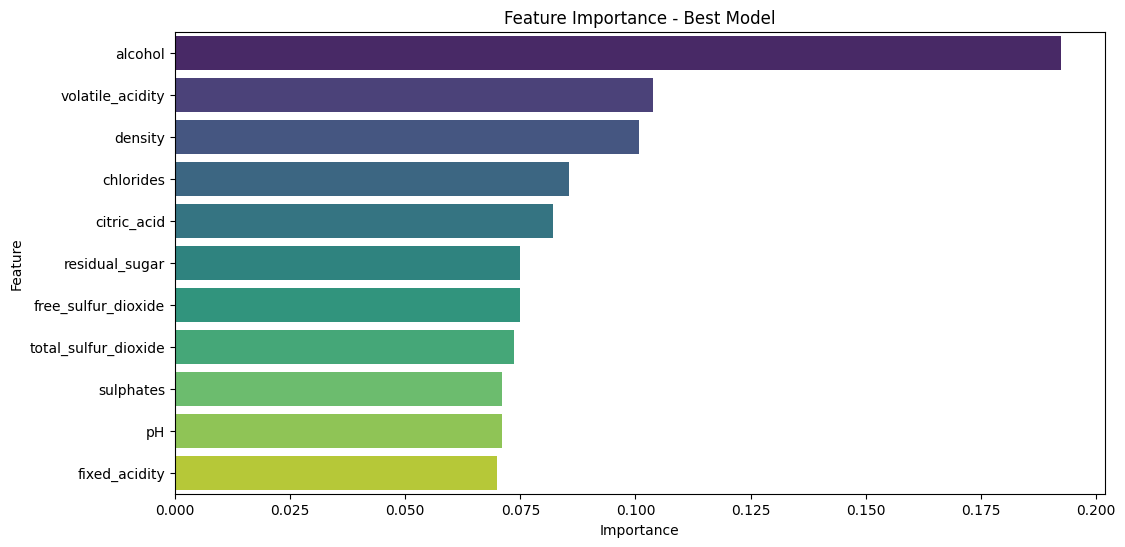

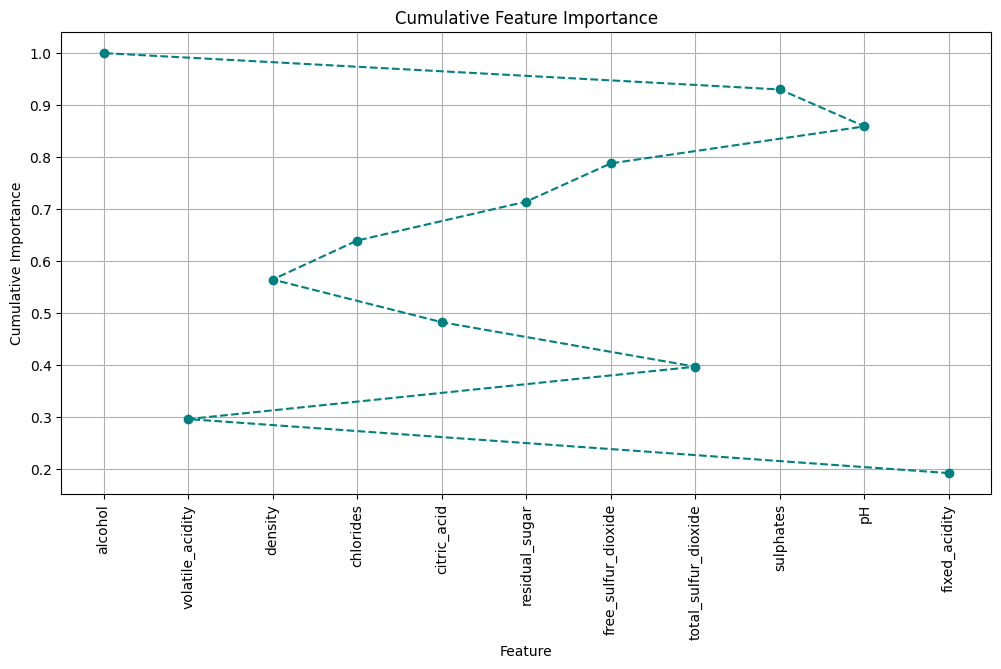

In [ ]:
# Mendapatkan nilai feature importance dari model terbaik
feature_importances = best_rf_model.feature_importances_
feature_names = X.columns

# Membuat DataFrame untuk feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Menampilkan feature importance
print("\nFeature Importance dari Model Terbaik:\n")
print(importance_df)

# Visualisasi feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title("Feature Importance - Best Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Visualisasi kumulatif feature importance
importance_df['Cumulative Importance'] = importance_df['Importance'].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(importance_df['Cumulative Importance'], marker='o', linestyle='--', color='teal')
plt.xticks(ticks=range(len(importance_df)), labels=importance_df['Feature'], rotation=90)
plt.title("Cumulative Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Cumulative Importance")
plt.grid()
plt.show()



Hasil Prediksi Sampel:

   Sample Index Actual Quality Predicted Quality
0             0         Medium            Medium
1             5            Low               Low
2            10         Medium            Medium
3            15         Medium            Medium
4            20            Low               Low


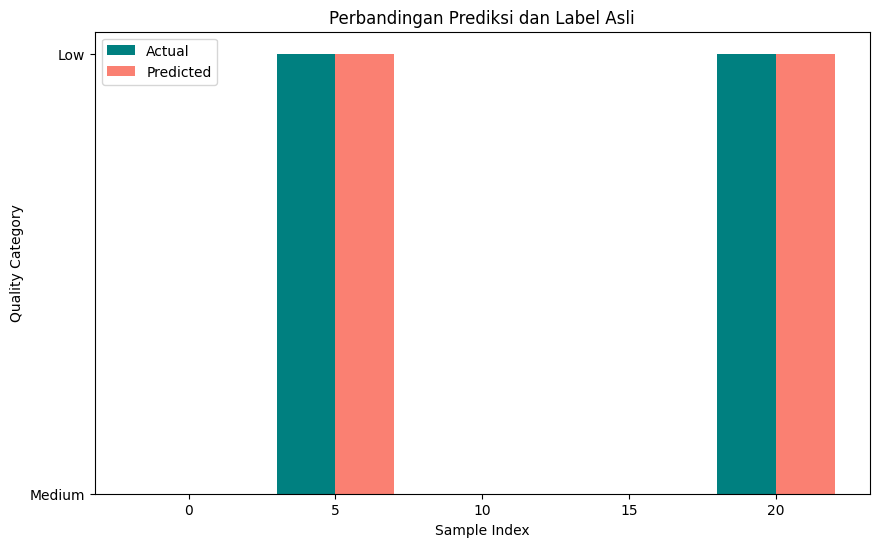

In [ ]:
# Pilih beberapa sampel dari data uji
sample_indices = [0, 5, 10, 15, 20]  # Indeks sampel yang ingin diprediksi
X_sample = X_test.iloc[sample_indices]
y_sample_actual = y_test.iloc[sample_indices]

# Lakukan prediksi pada sampel
y_sample_predicted = best_rf_model.predict(X_sample)

# Konversi hasil prediksi dan label asli menjadi DataFrame untuk dibandingkan
sample_predictions = pd.DataFrame({
    'Sample Index': sample_indices,
    'Actual Quality': y_sample_actual.values,
    'Predicted Quality': y_sample_predicted
})

# Menampilkan hasil prediksi
print("\nHasil Prediksi Sampel:\n")
print(sample_predictions)

# Visualisasi perbandingan hasil prediksi dan label asli
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(sample_indices))

plt.bar(index, sample_predictions['Actual Quality'], bar_width, label='Actual', color='teal')
plt.bar(index + bar_width, sample_predictions['Predicted Quality'], bar_width, label='Predicted', color='salmon')

plt.xlabel("Sample Index")
plt.ylabel("Quality Category")
plt.title("Perbandingan Prediksi dan Label Asli")
plt.xticks(index + bar_width / 2, sample_predictions['Sample Index'])
plt.legend()
plt.show()
